In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use("bmh")

In [2]:
csv_file_path = 'data/greedy/greedy_sensitivity.csv'
df = pd.read_csv(csv_file_path)

In [3]:
df.head(10)

,index,partitions,n_machines,n_jobs,n_operations,steps_min,steps_max,algorithm,makespan,runtime
0,0,3,10,10,30,5,10,greedy_main,298,0.000224
1,1,3,10,10,30,5,20,greedy_main,716,0.000386
2,2,3,10,10,30,5,30,greedy_main,968,0.000375
3,3,3,10,10,30,5,40,greedy_main,934,0.000419
4,4,3,10,10,30,6,10,greedy_main,360,0.000226
5,5,3,10,10,30,6,20,greedy_main,545,0.000271
6,6,3,10,10,30,6,30,greedy_main,911,0.000379
7,0,3,10,10,30,5,10,greedy_main,490,0.000246
8,1,3,10,10,30,5,20,greedy_main,620,0.000382
9,2,3,10,10,30,5,30,greedy_main,983,0.000397


In [4]:
df_n_jobs = df[(df['partitions'] == 7) & (df['n_machines'] == 50) & (df['n_operations'] == 30) & (df['steps_min'] == 5) & (df['steps_max'] == 20)]
display(df_n_jobs)

,index,partitions,n_machines,n_jobs,n_operations,steps_min,steps_max,algorithm,makespan,runtime
12680,12673,7,50,10,30,5,20,greedy_main,506,0.000648
12696,12689,7,50,15,30,5,20,greedy_main,446,0.000768
12712,12705,7,50,20,30,5,20,greedy_main,518,0.001044
12728,12721,7,50,25,30,5,20,greedy_main,562,0.001265
12744,12737,7,50,30,30,5,20,greedy_main,581,0.001695
12760,12753,7,50,35,30,5,20,greedy_main,462,0.001732
12776,12769,7,50,40,30,5,20,greedy_main,675,0.002148
12792,12785,7,50,45,30,5,20,greedy_main,588,0.002268
12808,12801,7,50,50,30,5,20,greedy_main,516,0.002483
12824,12817,7,50,55,30,5,20,greedy_main,588,0.002270


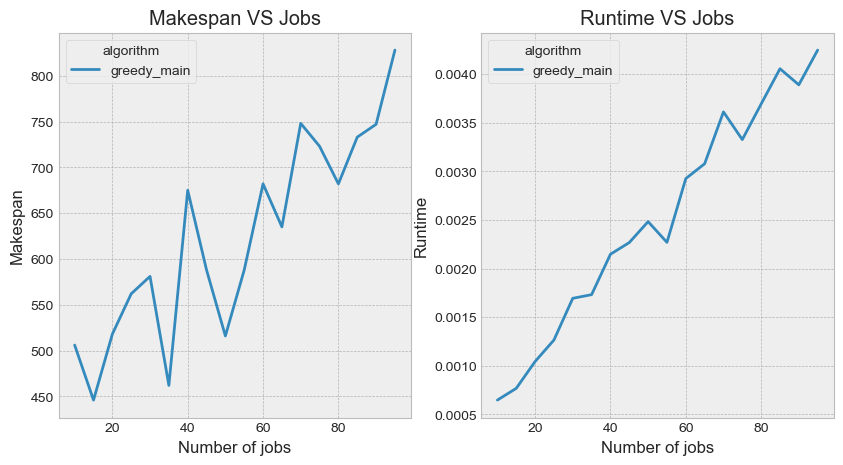

In [5]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax = axes[0]
sns.lineplot(x='n_jobs', y='makespan', hue='algorithm', data=df_n_jobs, ax=ax)
ax.set_title('Makespan VS Jobs')
ax.set_xlabel('Number of jobs')
ax.set_ylabel('Makespan')
ax = axes[1]
sns.lineplot(x='n_jobs', y='runtime', hue='algorithm', data=df_n_jobs, ax=ax)
ax.set_title('Runtime VS Jobs')
ax.set_xlabel('Number of jobs')
ax.set_ylabel('Runtime')
plt.show()

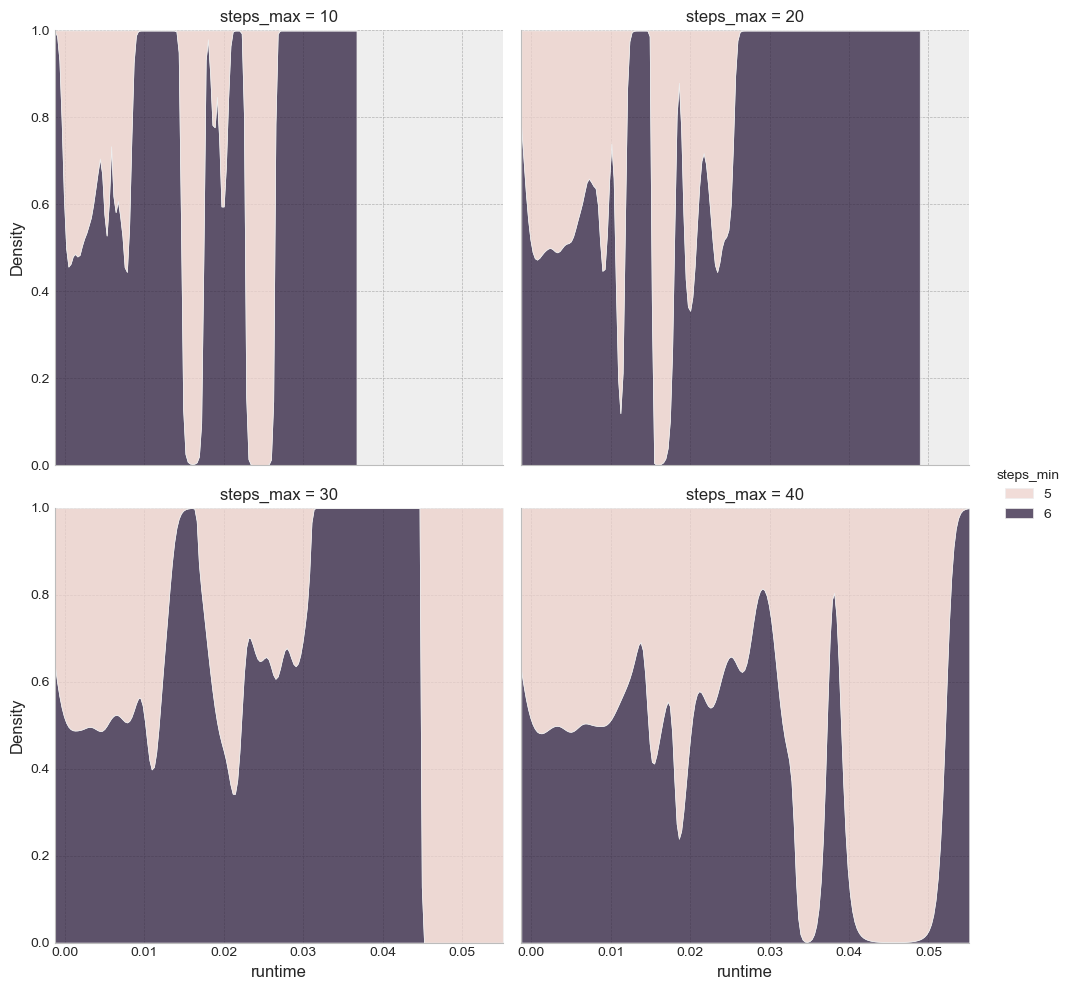

In [42]:
sns.displot(data=df, kind="kde", col="steps_max", col_wrap=2, x="runtime", hue="steps_min", multiple="fill")
plt.show()

In [41]:
df[df['runtime'] >= 0.05]

,index,partitions,n_machines,n_jobs,n_operations,steps_min,steps_max,algorithm,makespan,runtime
3617,3610,3,70,55,35,5,30,greedy_main,901,0.05371


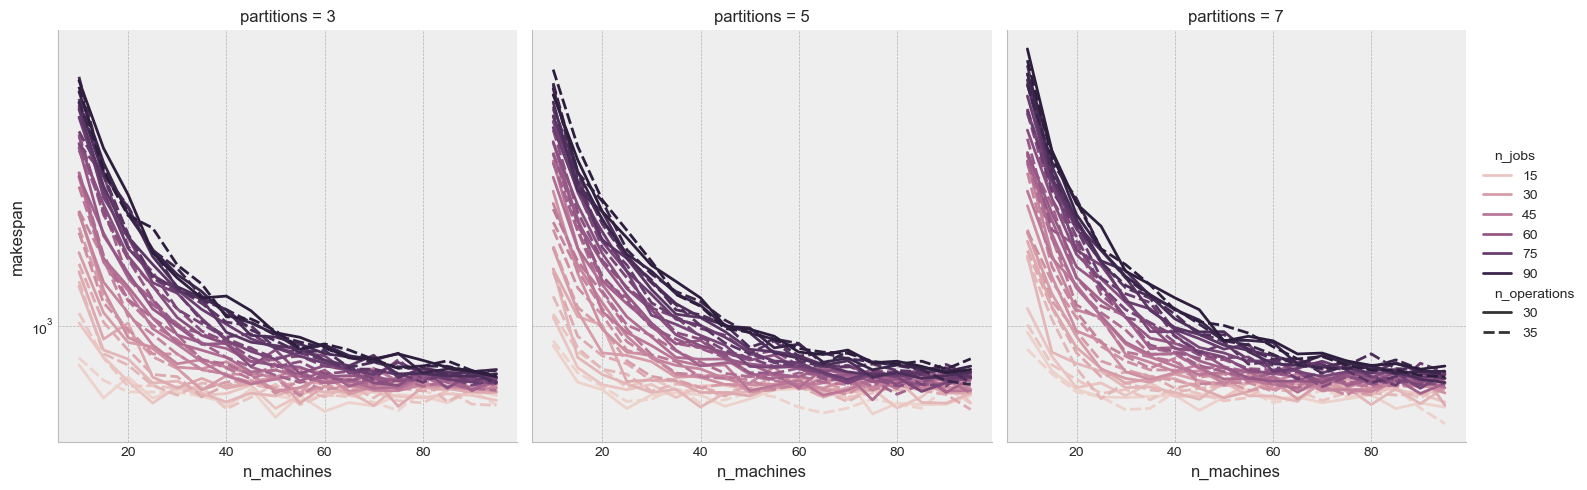

In [6]:
sns.relplot(
    data=df,
    col="partitions",
    kind="line",
    x="n_machines",
    y="makespan",
    hue="n_jobs",
    style="n_operations",
    errorbar=None,
).set(yscale="log")
plt.show()

In [7]:
df.query("n_operations == 30").head()

,index,partitions,n_machines,n_jobs,n_operations,steps_min,steps_max,algorithm,makespan,runtime
0,0,3,10,10,30,5,10,greedy_main,298,0.000224
1,1,3,10,10,30,5,20,greedy_main,716,0.000386
2,2,3,10,10,30,5,30,greedy_main,968,0.000375
3,3,3,10,10,30,5,40,greedy_main,934,0.000419
4,4,3,10,10,30,6,10,greedy_main,360,0.000226


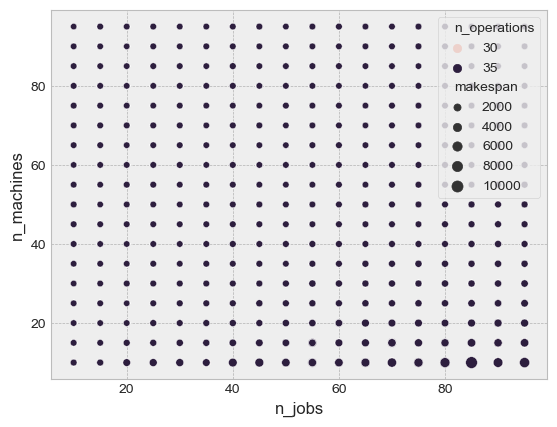

In [11]:
sns.scatterplot(
    data=df,
    size="makespan",
    x="n_jobs",
    y="n_machines",
    hue="n_operations",
)
plt.show()

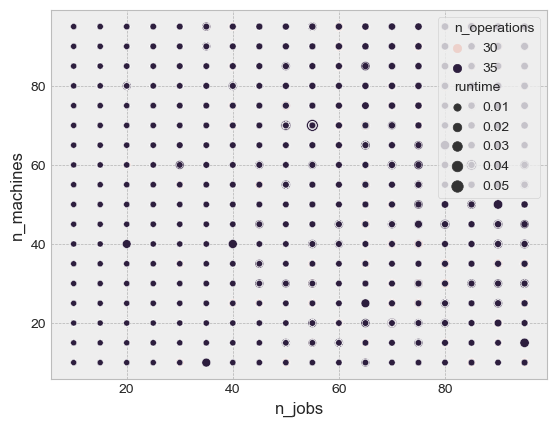

In [12]:
sns.scatterplot(
    data=df,
    size="runtime",
    x="n_jobs",
    y="n_machines",
    hue="n_operations",
)
plt.show()

In [8]:
df_n_machines = df[(df['partitions'] == 7) & (df['n_jobs'] == 60) & (df['n_operations'] == 30) & (df['steps_min'] == 5) & (df['steps_max'] == 20)]
display(df_n_machines)

,index,partitions,n_machines,n_jobs,n_operations,steps_min,steps_max,algorithm,makespan,runtime
10536,10529,7,10,60,30,5,20,greedy_main,2257,0.001760
10824,10817,7,15,60,30,5,20,greedy_main,1470,0.002003
11112,11105,7,20,60,30,5,20,greedy_main,1153,0.001985
11400,11393,7,25,60,30,5,20,greedy_main,1148,0.002184
11688,11681,7,30,60,30,5,20,greedy_main,933,0.002268
11976,11969,7,35,60,30,5,20,greedy_main,680,0.002062
12264,12257,7,40,60,30,5,20,greedy_main,649,0.002475
12552,12545,7,45,60,30,5,20,greedy_main,605,0.002980
12840,12833,7,50,60,30,5,20,greedy_main,682,0.002926
13128,13121,7,55,60,30,5,20,greedy_main,662,0.003273


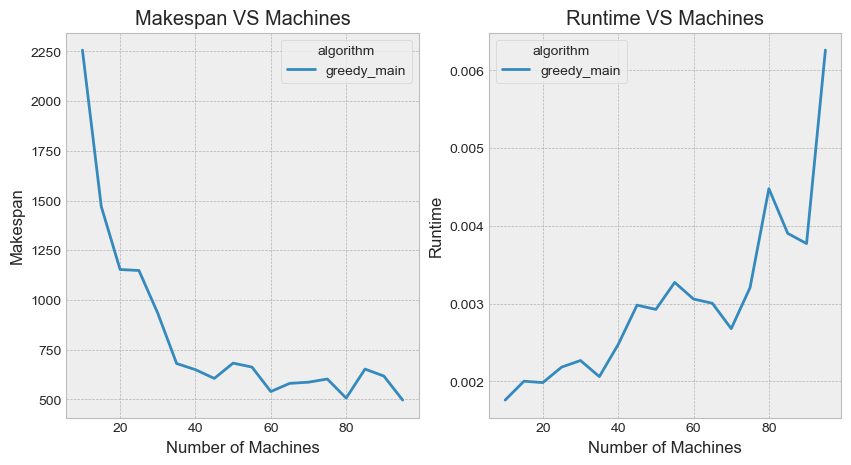

In [9]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax = axes[0]
sns.lineplot(x='n_machines', y='makespan', hue='algorithm', data=df_n_machines, ax=ax)
ax.set_title('Makespan VS Machines')
ax.set_xlabel('Number of Machines')
ax.set_ylabel('Makespan')
ax = axes[1]
sns.lineplot(x='n_machines', y='runtime', hue='algorithm', data=df_n_machines, ax=ax)
ax.set_title('Runtime VS Machines')
ax.set_xlabel('Number of Machines')
ax.set_ylabel('Runtime')
plt.show()

In [10]:
df_n_steps_max = df[(df['partitions'] == 7) & (df['n_jobs'] == 60) & (df['n_machines'] == 40) & (df['n_operations'] == 30) & (df['steps_min'] == 5)]
display(df_n_steps_max)

,index,partitions,n_machines,n_jobs,n_operations,steps_min,steps_max,algorithm,makespan,runtime
12263,12256,7,40,60,30,5,10,greedy_main,406,0.001376
12264,12257,7,40,60,30,5,20,greedy_main,649,0.002475
12265,12258,7,40,60,30,5,30,greedy_main,902,0.003841
12266,12259,7,40,60,30,5,40,greedy_main,1268,0.005318
